<a href="https://colab.research.google.com/github/Devesh-DevCodes/NewsClassification/blob/main/NewsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets


In [39]:
# 1. Load the AG News Dataset
from datasets import load_dataset
import pandas as pd

# Load AG News dataset
dataset = load_dataset("ag_news")

# Convert train split to DataFrame
df = pd.DataFrame(dataset['train'])

In [5]:
# print some rows
print(df.head());

                                                text  label
0  Wall St. Bears Claw Back Into the Black (Reute...      2
1  Carlyle Looks Toward Commercial Aerospace (Reu...      2
2  Oil and Economy Cloud Stocks' Outlook (Reuters...      2
3  Iraq Halts Oil Exports from Main Southern Pipe...      2
4  Oil prices soar to all-time record, posing new...      2


In [6]:
# 2.Handle Missing Values and Remove Duplicates

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Drop missing values if any
df.dropna(inplace=True)

# Remove duplicate rows
df.drop_duplicates(subset='text', inplace=True)



Missing values:
 text     0
label    0
dtype: int64


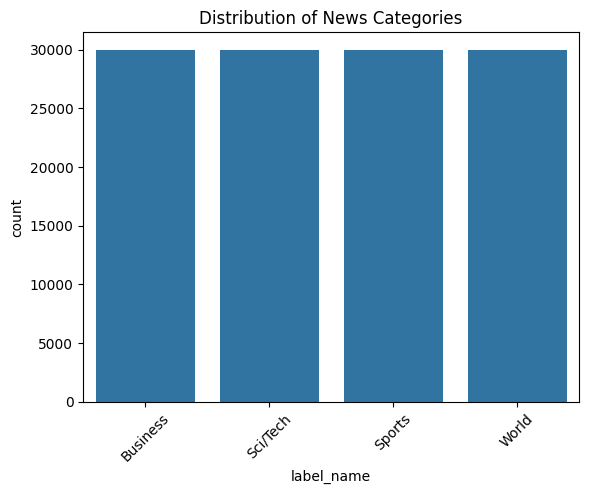

In [7]:
#  3.Display Distribution of Target Labels

import seaborn as sns
import matplotlib.pyplot as plt

# Add readable label names
df['label_name'] = df['label'].apply(lambda x: dataset['train'].features['label'].names[x])

# Countplot
sns.countplot(x='label_name', data=df)
plt.title('Distribution of News Categories')
plt.xticks(rotation=45)
plt.show()


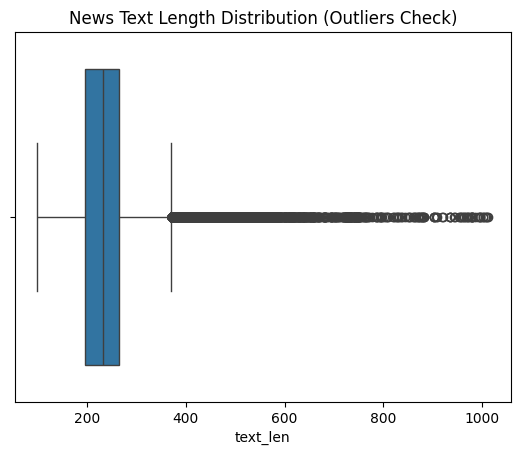

In [8]:
# 4.Check and Handle Outliers with Boxplot
# use text length to find outliers in this textual dataset
df['text_len'] = df['text'].apply(len)

# Boxplot to identify length outliers
sns.boxplot(x=df['text_len'])
plt.title('News Text Length Distribution (Outliers Check)')
plt.show()


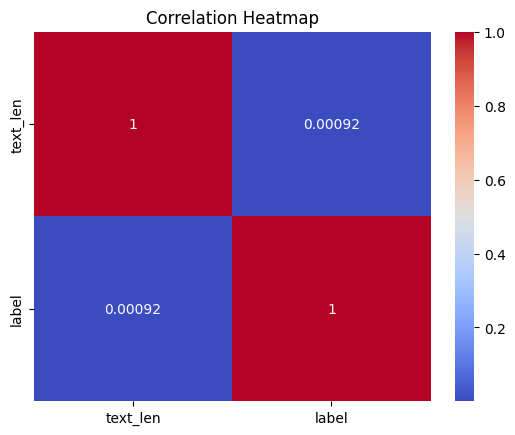

In [9]:
# 5.Correlation Using Heatmap (On Text Length Only)

# Correlation heatmap
corr = df[['text_len', 'label']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [11]:
# 6.Preprocessing (Text Cleaning - basic)
import re

def clean_text(text):
    text = text.lower()                # Lowercase
    text = re.sub(r'\s+', ' ', text)    # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    return text.strip()

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)



In [14]:
# 7.Encode Target & Normalize Input Text

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(df['clean_text'])

# Target variable
y = df['label']  # numerical : Category ID



In [13]:
# 8.Split Data into Train and Test Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [15]:
# 9.Train Two Models and Compare

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# SVM
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Performance:\n")
print(classification_report(y_test, lr_preds))

# Evaluate SVM
print("SVM Performance:\n")
print(classification_report(y_test, svm_preds))


Logistic Regression Performance:

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      5956
           1       0.95      0.97      0.96      6058
           2       0.87      0.88      0.87      5911
           3       0.89      0.88      0.88      6075

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000

SVM Performance:

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      5956
           1       0.95      0.98      0.96      6058
           2       0.86      0.88      0.87      5911
           3       0.88      0.87      0.88      6075

    accuracy                           0.90     24000
   macro avg       0.90      0.90      0.90     24000
weighted avg       0.90      0.90      0.90     24000



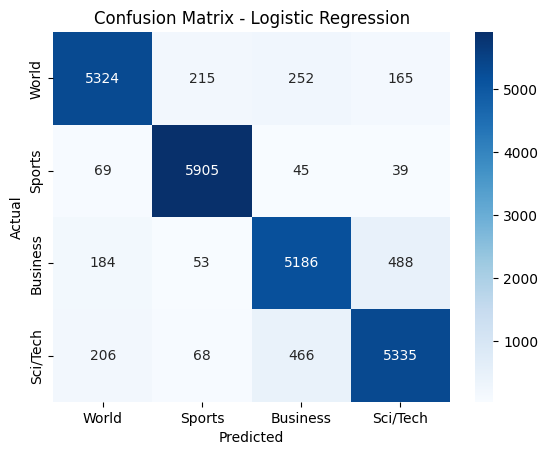

In [38]:
# 10.Plot Confusion Matrix (for : LR)

import seaborn as sns

cm = confusion_matrix(y_test, lr_preds)
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=dataset['train'].features['label'].names,
    yticklabels=dataset['train'].features['label'].names
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()



In [41]:
# Mapping labels to their text
label_names = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}
df['label_text'] = df['label'].map(label_names)

print(df.head())

                                                text  label label_text
0  Wall St. Bears Claw Back Into the Black (Reute...      2   Business
1  Carlyle Looks Toward Commercial Aerospace (Reu...      2   Business
2  Oil and Economy Cloud Stocks' Outlook (Reuters...      2   Business
3  Iraq Halts Oil Exports from Main Southern Pipe...      2   Business
4  Oil prices soar to all-time record, posing new...      2   Business


In [36]:
# 11.Function to Predict New News Category using LR model
# Mapping for label names
label_names = dataset['train'].features['label'].names

def predict_category(news_text):
    # Step 1: Clean the text
    clean_news = clean_text(news_text)

    # Step 2: Vectorize the cleaned text
    news_vec = vectorizer.transform([clean_news])

    # Step 3: Predict using the trained Logistic Regression model
    pred_label = lr_model.predict(news_vec)[0]

    # Step 4: Map the numerical label to the category name
    category = label_names[pred_label]

    return category

# Take input from the user
news_input = input("Enter your news text: ")

# Predict the category
predicted_category = predict_category(news_input)

# Print the predicted news category
print(f"\nPredicted News Category (LR): {predicted_category}")


# ISRO successfully launches the Chandrayaan-3 mission to explore the Moon
# India and China engage in diplomatic talks to resolve border issues after years of tension.
# Global leaders including India pledge to reduce carbon emissions in line with the Paris Climate Agreement.

Enter your news text: ISRO successfully launches the Chandrayaan-3 mission to explore the Moon

Predicted News Category (LR): Sci/Tech


In [35]:
# 12.Function to Predict New News Text using SVM

def predict_category_svm(news_text):
    # Step 1: Clean the text
    clean_news = clean_text(news_text)

    # Step 2: Vectorize the cleaned text
    news_vec = vectorizer.transform([clean_news])

    # Step 3: Predict using the trained SVM model
    pred_label = svm_model.predict(news_vec)[0]

    # Step 4: Map the numerical label to the category name
    category = label_names[pred_label]

    return category

# Take input from the user
news_input = input("Enter your news text: ")

# Predict the category
predicted_category_svm = predict_category_svm(news_input)

# Print the predicted news category
print(f"\nPredicted News Category (SVM): {predicted_category_svm}")

# Tesla's stock prices soar after successful launch of their new electric vehicle.
# Reliance Industries reports a significant increase in profits, driven by its retail and telecom businesses.
# Indian Open Relay Competition: Gurindervir, Animesh, Manikanta and Amlan smash 15-year national record in men's 4x100m

Enter your news text: Global leaders including India pledge to reduce carbon emissions in line with the Paris Climate Agreement.

Predicted News Category (SVM): World
